# EDA & Insights Questionnaire

## Task 1: Data Merging 📂

- Combine the data available in three different formats — Excel (.xlsx), JSON (.json), and Database (.db) — into a single unified DataFrame.

- Each file contains complementary information about apps, such as app metadata, user reviews, and sentiment analysis results.

- Ensure proper key-based merging using the common ‘App’ column 🔗 and handle potential inconsistencies such as:

- Mismatched category labels or inconsistent casing

- Missing or misaligned entries between files


- Goal : Produce a single clean dataset ready for exploration and analysis.

### Importing required Libraries

In [11]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random as rd
import os 
import sqlite3

import datetime


import warnings 
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Getting all types of data and assigning varibles them

In [27]:
xl_file =r"C:\Users\chidv\Downloads\Set_2\Play_store_and_User_reviews_set_1.xlsx"
df_excel = pd.read_excel(xl_file)
df_excel.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [28]:
j1 = r"C:\Users\chidv\Downloads\Set_2\Play_Store_set_2_data_1.json"
j2 = r"C:\Users\chidv\Downloads\Set_2\Play_Store_set_2_data_2.json"
j3 = r"C:\Users\chidv\Downloads\Set_2\Use_reviews_set_2_data.json"

def load_json(path):
    try:
        return pd.read_json(path)
    except:
        return pd.read_json(path, lines=True)

df_json1 = load_json(j1)
df_json2 = load_json(j2)
df_reviews = load_json(j3)

df_json1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,One Night at Golden Freddy's,GAME,3.3,2717,4.0M,"100,000+",Free,0.0,Teen,Action,2017-12-07 00:00:00,0.1,2.3 and up
1,DIRECTV for Tablets,FAMILY,3.9,24123,69M,"1,000,000+",Free,0.0,Teen,Entertainment,2018-06-01 00:00:00,5.9.006,4.1 and up
2,Nights at Cube Pizzeria 3D – 4,GAME,4.1,7728,39M,"500,000+",Free,0.0,Teen,Adventure,2018-07-17 00:00:00,1.5.0,4.4 and up
3,Five Nights at Neighbor House,GAME,4.2,2180,55M,"100,000+",Free,0.0,Everyone 10+,Action,2018-01-26 00:00:00,1.1.0,4.2 and up
4,Asylum Night Shift - Five Nights Survival,GAME,4.0,59223,46M,"5,000,000+",Free,0.0,Teen,Action,2018-06-26 00:00:00,1.6.5,4.1 and up


In [36]:
import sqlite3
import pandas as pd
db = r"C:\Users\chidv\Downloads\Set_2\playstore_data.db"
# connect to database
conn = sqlite3.connect(db)

# list tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


                  name
0      sqlite_sequence
1    Play_Store_Data_2
2  User_Reviews_Data_2


In [37]:
db_tables = {}
for t in tables['name']:
    df = pd.read_sql_query(f'SELECT * FROM "{t}"', conn)
    db_tables[t] = df
    print(f"Loaded table: {t}, shape: {df.shape}")


Loaded table: sqlite_sequence, shape: (0, 2)
Loaded table: Play_Store_Data_2, shape: (2589, 13)
Loaded table: User_Reviews_Data_2, shape: (930, 5)


In [38]:
db_tables

{'sqlite_sequence': Empty DataFrame
 Columns: [name, seq]
 Index: [],
 'Play_Store_Data_2':                                                     App     Category  Rating  \
 0                        Font Studio- Photo Texts Image  PHOTOGRAPHY     4.2   
 1                                     Add Text To Photo  PHOTOGRAPHY     4.1   
 2                               Phonto - Text on Photos  PHOTOGRAPHY     4.3   
 3                         Collage&Add Stickers papelook  PHOTOGRAPHY     4.0   
 4     Shutterfly: Free Prints, Photo Books, Cards, G...  PHOTOGRAPHY     4.6   
 ...                                                 ...          ...     ...   
 2584                            Five Nights at Freddy's         GAME     4.6   
 2585                     Nights at Cube Pizzeria 3D – 3       FAMILY     4.0   
 2586                     7 Nights at Pixel Pizzeria - 2         GAME     4.0   
 2587                      Nights at Slender Pizzeria 3D         GAME     4.1   
 2588             

In [41]:
table_name = tables['name'][0]      # choose first table
df_sql = pd.read_sql_query(f'SELECT * FROM "{table_name}"', conn)

In [42]:
print(df_sql.columns)


Index(['name', 'seq'], dtype='object')


In [49]:
import sqlite3, pandas as pd
conn = sqlite3.connect(db)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)
conn.close()

                  name
0      sqlite_sequence
1    Play_Store_Data_2
2  User_Reviews_Data_2


In [50]:
conn = sqlite3.connect(db)
for t in tables['name']:
    try:
        df = pd.read_sql_query(f'SELECT * FROM "{t}" LIMIT 1', conn)
        print(f"TABLE: {t}  -- columns: {list(df.columns)}")
    except Exception as e:
        print(f"Could not read table {t}: {e}")
conn.close()


TABLE: sqlite_sequence  -- columns: ['name', 'seq']
TABLE: Play_Store_Data_2  -- columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
TABLE: User_Reviews_Data_2  -- columns: ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [53]:
conn = sqlite3.connect(db)
df_play = pd.read_sql_query('SELECT * FROM "Play_Store_Data_2" LIMIT 5', conn)
df_rev  = pd.read_sql_query('SELECT * FROM "User_Reviews_Data_2" LIMIT 5', conn)
conn.close()

print("Play table columns:", df_play.columns.tolist())
print(df_play.head())
print("\nReviews table columns:", df_rev.columns.tolist())
print(df_rev.head())


Play table columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
                                                 App     Category  Rating  \
0                     Font Studio- Photo Texts Image  PHOTOGRAPHY     4.2   
1                                  Add Text To Photo  PHOTOGRAPHY     4.1   
2                            Phonto - Text on Photos  PHOTOGRAPHY     4.3   
3                      Collage&Add Stickers papelook  PHOTOGRAPHY     4.0   
4  Shutterfly: Free Prints, Photo Books, Cards, G...  PHOTOGRAPHY     4.6   

   Reviews  Size     Installs  Type  Price Content Rating       Genres  \
0   197295   24M  10,000,000+  Free    0.0       Everyone  Photography   
1    21578  1.6M   1,000,000+  Free    0.0       Everyone  Photography   
2   307453   17M  10,000,000+  Free    0.0       Everyone  Photography   
3    32896   31M   5,000,000+  Free    0.0       Everyone  Photograph

In [58]:
conn = sqlite3.connect(db)
df_sql_meta = pd.read_sql_query('SELECT * FROM "Play_Store_Data_2"', conn)
df_sql_reviews = pd.read_sql_query('SELECT * FROM "User_Reviews_Data_2"', conn)
conn.close()


In [61]:
df_excel["key"] = df_excel["App"].str.lower()
df_json1["key"] = df_json1["App"].str.lower()
df_json2["key"] = df_json2["App"].str.lower()
df_reviews["key"] = df_reviews["App"].str.lower()
df_sql_meta["key"] = df_sql_meta["App"].str.lower()
df_sql_reviews["key"] = df_sql_reviews["App"].str.lower()

## Performing the Merge operations 

In [64]:
merged = (
    df_sql_meta
    .merge(df_sql_reviews, on="key", how="left", suffixes=("", "_sqlrev"))
    .merge(df_json1, on="key", how="left", suffixes=("", "_j1"))
    .merge(df_json2, on="key", how="left", suffixes=("", "_j2"))
    .merge(df_excel, on="key", how="left", suffixes=("", "_excel"))
    .merge(df_reviews, on="key", how="left", suffixes=("", "_jsonrev"))
)

# ----------------- SAVE ------------------------
merged.to_csv(r"C:\Users\chidv\Downloads\Set_2\final_merged_playstore.csv", index=False)

merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Content Rating_excel,Genres_excel,Last Updated_excel,Current Ver_excel,Android Ver_excel,App_jsonrev,Translated_Review_jsonrev,Sentiment_jsonrev,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev
0,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.0,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,There ton ads. I understand needs sort ad sinc...,Positive,0.225714,0.442857
1,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.0,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,"It amazing, simple app, upon time. Now frustra...",Positive,0.050000,0.539286
2,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.0,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,Finally decided try out. I love easy add text ...,Positive,0.108333,0.658333
3,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.0,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,Barely worth & mind hit w/ ads every clicks. H...,Positive,0.300000,0.100000
4,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.0,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,I like it. It takes much space. And everyone c...,Positive,0.300000,0.400000


#### Again loading  the saved Data

In [127]:
df=pd.read_csv(r"C:\Users\chidv\Downloads\Set_2\final_merged_playstore.csv")

In [128]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Content Rating_excel,Genres_excel,Last Updated_excel,Current Ver_excel,Android Ver_excel,App_jsonrev,Translated_Review_jsonrev,Sentiment_jsonrev,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev
0,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,There ton ads. I understand needs sort ad sinc...,Positive,0.225714,0.442857
1,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,"It amazing, simple app, upon time. Now frustra...",Positive,0.050000,0.539286
2,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,Finally decided try out. I love easy add text ...,Positive,0.108333,0.658333
3,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,Barely worth & mind hit w/ ads every clicks. H...,Positive,0.300000,0.100000
4,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,...,NaN,NaN,NaN,NaN,NaN,Font Studio- Photo Texts Image,I like it. It takes much space. And everyone c...,Positive,0.300000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,Five Nights at Freddy's,GAME,4.6,100805,50M,"1,000,000+",Paid,2.99,Teen,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11705,Nights at Cube Pizzeria 3D – 3,FAMILY,4.0,15875,40M,"1,000,000+",Free,0.00,Teen,Simulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11706,7 Nights at Pixel Pizzeria - 2,GAME,4.0,23168,54M,"1,000,000+",Free,0.00,Teen,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11707,Nights at Slender Pizzeria 3D,GAME,4.1,2628,45M,"100,000+",Free,0.00,Teen,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             11709 non-null  object 
 1   Category                        11709 non-null  object 
 2   Rating                          11526 non-null  float64
 3   Reviews                         11709 non-null  int64  
 4   Size                            11709 non-null  object 
 5   Installs                        11709 non-null  object 
 6   Type                            11709 non-null  object 
 7   Price                           11709 non-null  float64
 8   Content Rating                  11709 non-null  object 
 9   Genres                          11709 non-null  object 
 10  Last Updated                    11709 non-null  object 
 11  Current Ver                     11709 non-null  object 
 12  Android Ver                     

In [130]:
df.describe()

,Rating,Reviews,Price,Sentiment_Polarity,Sentiment_Subjectivity,Rating_j1,Reviews_j1,Price_j1,Rating_j2,Reviews_j2,Price_j2,Rating_excel,Reviews_excel,Price_excel,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev
count,11526.000000,1.170900e+04,11709.000000,2132.000000,2132.000000,88.000000,8.800000e+01,88.000000,181.000000,1.810000e+02,181.0,4219.000000,4.219000e+03,4219.000000,9007.000000,9007.000000
mean,4.292296,2.141637e+06,0.673834,0.002411,0.498218,4.380682,5.434195e+05,0.348750,4.100000,1.018756e+06,0.0,4.353188,5.009347e+06,0.007812,0.168378,0.502344
std,0.299312,8.512644e+06,14.155559,0.217716,0.133067,0.176073,8.417364e+05,0.475612,0.197203,1.172460e+06,0.0,0.151853,1.356419e+07,0.267615,0.322064,0.231628
min,1.000000,0.000000e+00,0.000000,-0.888281,0.000000,3.700000,1.156000e+03,0.000000,3.900000,1.697000e+03,0.0,2.600000,8.000000e+00,0.000000,-1.000000,0.000000
25%,4.200000,2.219100e+04,0.000000,-0.141071,0.426042,4.300000,5.861400e+04,0.000000,3.900000,2.264530e+05,0.0,4.300000,1.381820e+06,0.000000,0.000000,0.400000
50%,4.400000,2.264560e+05,0.000000,0.003917,0.500000,4.400000,1.975590e+05,0.000000,4.200000,8.780650e+05,0.0,4.400000,1.381820e+06,0.000000,0.134872,0.533333
75%,4.400000,1.381624e+06,0.000000,0.122222,0.600000,4.500000,8.387380e+05,0.990000,4.300000,8.780650e+05,0.0,4.400000,2.123381e+06,0.000000,0.362500,0.625000
max,5.000000,7.812821e+07,400.000000,1.000000,1.000000,4.800000,6.700847e+06,0.990000,4.800000,1.275982e+07,0.0,4.900000,7.815831e+07,12.990000,1.000000,1.000000


# Task 2: Data Cleaning 🧽

•After merging, identify and address data quality challenges such as:

• Handling missing values in columns like Rating, Reviews, and Size

• Cleaning and converting string-based numeric columns (Installs, Price, Reviews) into numeric format

• Standardizing category names, Type, and Content Rating for uniformity

• Removing invalid records such as apps with Rating > 5 or duplicates

• Converting Size (MB/KB) and Last Updated columns into consistent formats


Your cleaned dataset should be reliable, structured, and consistent for further analysis.



### Six Main Issues or inconsisties of data
- Mising values
- Duplicates
- Null values
- Incosistant datatypes
- In consistant data
- Outlies 

In [131]:
# Checking the missing values 

df.isna().sum()

App                                  0
Category                             0
Rating                             183
Reviews                              0
Size                                 0
                                  ... 
App_jsonrev                       2702
Translated_Review_jsonrev         2702
Sentiment_jsonrev                 2702
Sentiment_Polarity_jsonrev        2702
Sentiment_Subjectivity_jsonrev    2702
Length: 63, dtype: int64

In [132]:
# Percentages 
td=df.isna().sum()
p=td/len(df)*100
print(p.sort_values(ascending=False))


Installs_j1        99.248441
Type_j1            99.248441
Price_j1           99.248441
Current Ver_j1     99.248441
Last Updated_j1    99.248441
                     ...    
key                 0.000000
Reviews             0.000000
Size                0.000000
App                 0.000000
Category            0.000000
Length: 63, dtype: float64


### Droping the columns where Nan Value percentages  are  greater than 50 By using 

In [133]:
df.drop(p[p>50].index,axis=1,inplace=True) # 44 columns are Removed 

In [134]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,key,App_jsonrev,Translated_Review_jsonrev,Sentiment_jsonrev,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev
0,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,There ton ads. I understand needs sort ad sinc...,Positive,0.225714,0.442857
1,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,"It amazing, simple app, upon time. Now frustra...",Positive,0.050000,0.539286
2,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,Finally decided try out. I love easy add text ...,Positive,0.108333,0.658333
3,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,Barely worth & mind hit w/ ads every clicks. H...,Positive,0.300000,0.100000
4,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,I like it. It takes much space. And everyone c...,Positive,0.300000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,Five Nights at Freddy's,GAME,4.6,100805,50M,"1,000,000+",Paid,2.99,Teen,Action,2014-12-02 00:00:00,1.85,2.3 and up,five nights at freddy's,NaN,NaN,NaN,NaN,NaN
11705,Nights at Cube Pizzeria 3D – 3,FAMILY,4.0,15875,40M,"1,000,000+",Free,0.00,Teen,Simulation,2017-03-03 00:00:00,1.5,4.2 and up,nights at cube pizzeria 3d – 3,NaN,NaN,NaN,NaN,NaN
11706,7 Nights at Pixel Pizzeria - 2,GAME,4.0,23168,54M,"1,000,000+",Free,0.00,Teen,Adventure,2018-07-09 00:00:00,1.3.0,4.4 and up,7 nights at pixel pizzeria - 2,NaN,NaN,NaN,NaN,NaN
11707,Nights at Slender Pizzeria 3D,GAME,4.1,2628,45M,"100,000+",Free,0.00,Teen,Adventure,2017-05-22 00:00:00,1.1,4.2 and up,nights at slender pizzeria 3d,NaN,NaN,NaN,NaN,NaN


## Treating the nan Values 

In [135]:
td=df.isna().sum()
p=td/len(df)*100
p

App                                0.000000
Category                           0.000000
Rating                             1.562900
Reviews                            0.000000
Size                               0.000000
Installs                           0.000000
Type                               0.000000
Price                              0.000000
Content Rating                     0.000000
Genres                             0.000000
Last Updated                       0.000000
Current Ver                        0.000000
Android Ver                        0.017081
key                                0.000000
App_jsonrev                       23.076266
Translated_Review_jsonrev         23.076266
Sentiment_jsonrev                 23.076266
Sentiment_Polarity_jsonrev        23.076266
Sentiment_Subjectivity_jsonrev    23.076266
dtype: float64


### we can't do any thing with `Translated_Review_jsonrev` snd `'App_jsonrev`bcoz the are text descriptions 

In [136]:
df.Translated_Review_jsonrev

0        There ton ads. I understand needs sort ad sinc...
1        It amazing, simple app, upon time. Now frustra...
2        Finally decided try out. I love easy add text ...
3        Barely worth & mind hit w/ ads every clicks. H...
4        I like it. It takes much space. And everyone c...
                               ...                        
11704                                                  NaN
11705                                                  NaN
11706                                                  NaN
11707                                                  NaN
11708                                                  NaN
Name: Translated_Review_jsonrev, Length: 11709, dtype: object

In [150]:
df.Translated_Review_jsonrev=df.Translated_Review_jsonrev.fillna('')

0        There ton ads. I understand needs sort ad sinc...
1        It amazing, simple app, upon time. Now frustra...
2        Finally decided try out. I love easy add text ...
3        Barely worth & mind hit w/ ads every clicks. H...
4        I like it. It takes much space. And everyone c...
                               ...                        
11704                                                     
11705                                                     
11706                                                     
11707                                                     
11708                                                     
Name: Translated_Review_jsonrev, Length: 11709, dtype: object

In [173]:
df.App_jsonrev=df.App_jsonrev.fillna('')

### We use `mode` for Sentiment_jsonrev

In [166]:
df['Sentiment_jsonrev']=df['Sentiment_jsonrev'].fillna(df['Sentiment_jsonrev'].mode()[0])


### We use the `Median` for this column  Sentiment_Polarity_jsonrev  and  Sentiment_Subjectivity_jsonrev  


In [177]:
lst=['Sentiment_Polarity_jsonrev','Sentiment_Subjectivity_jsonrev','Rating']
for every in lst:
    Xmid=df[every].median()
    df[every]=df[every].fillna(Xmid)

## Therefore all outliers are  Reduced 

In [178]:
td=df.isna().sum()
p=td/len(df)*100
p

App                               0.000000
Category                          0.000000
Rating                            0.000000
Reviews                           0.000000
Size                              0.000000
Installs                          0.000000
Type                              0.000000
Price                             0.000000
Content Rating                    0.000000
Genres                            0.000000
Last Updated                      0.000000
Current Ver                       0.000000
Android Ver                       0.017081
key                               0.000000
App_jsonrev                       0.000000
Translated_Review_jsonrev         0.000000
Sentiment_jsonrev                 0.000000
Sentiment_Polarity_jsonrev        0.000000
Sentiment_Subjectivity_jsonrev    0.000000
dtype: float64

In [179]:
df_copy=df.copy()

In [180]:
df
cols_converted=['Price'.]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,key,App_jsonrev,Translated_Review_jsonrev,Sentiment_jsonrev,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev
0,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,There ton ads. I understand needs sort ad sinc...,Positive,0.225714,0.442857
1,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,"It amazing, simple app, upon time. Now frustra...",Positive,0.050000,0.539286
2,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,Finally decided try out. I love easy add text ...,Positive,0.108333,0.658333
3,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,Barely worth & mind hit w/ ads every clicks. H...,Positive,0.300000,0.100000
4,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24M,"10,000,000+",Free,0.00,Everyone,Photography,2017-06-23 00:00:00,4.0.7,4.0 and up,font studio- photo texts image,Font Studio- Photo Texts Image,I like it. It takes much space. And everyone c...,Positive,0.300000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,Five Nights at Freddy's,GAME,4.6,100805,50M,"1,000,000+",Paid,2.99,Teen,Action,2014-12-02 00:00:00,1.85,2.3 and up,five nights at freddy's,,,Positive,0.134872,0.533333
11705,Nights at Cube Pizzeria 3D – 3,FAMILY,4.0,15875,40M,"1,000,000+",Free,0.00,Teen,Simulation,2017-03-03 00:00:00,1.5,4.2 and up,nights at cube pizzeria 3d – 3,,,Positive,0.134872,0.533333
11706,7 Nights at Pixel Pizzeria - 2,GAME,4.0,23168,54M,"1,000,000+",Free,0.00,Teen,Adventure,2018-07-09 00:00:00,1.3.0,4.4 and up,7 nights at pixel pizzeria - 2,,,Positive,0.134872,0.533333
11707,Nights at Slender Pizzeria 3D,GAME,4.1,2628,45M,"100,000+",Free,0.00,Teen,Adventure,2017-05-22 00:00:00,1.1,4.2 and up,nights at slender pizzeria 3d,,,Positive,0.134872,0.533333


##  Cleaning and converting string-based numeric columns (Installs, Price, Reviews) into numeric format

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             11709 non-null  object 
 1   Category                        11709 non-null  object 
 2   Rating                          11709 non-null  float64
 3   Reviews                         11709 non-null  int64  
 4   Size                            11709 non-null  object 
 5   Installs                        11709 non-null  object 
 6   Type                            11709 non-null  object 
 7   Price                           11709 non-null  float64
 8   Content Rating                  11709 non-null  object 
 9   Genres                          11709 non-null  object 
 10  Last Updated                    11709 non-null  object 
 11  Current Ver                     11709 non-null  object 
 12  Android Ver                     

In [184]:
df['Price']=df['Price'].astype(int)
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
11704    2
11705    0
11706    0
11707    0
11708    0
Name: Price, Length: 11709, dtype: int64

In [ ]:
df['Installs']=df['Installs'].str.extract(r'(\d+)')[0]
df['Size']=df['Size'].str.extract(r'(\d+)')[0]

In [188]:
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')
df['Size']=pd.to_numeric(df['Size'],errors='coerce')

In [191]:
df['Android Ver']=df['Android Ver'].str.extract(r'(\d+)')[0]

In [192]:
df['Current Ver']=pd.to_numeric(df['Current Ver'],errors='coerce')
df['Android Ver']=pd.to_numeric(df['Android Ver'],errors='coerce')
df['Sentiment_Subjectivity_jsonrev']=pd.to_numeric(df['Sentiment_Subjectivity_jsonrev'],errors='coerce')
df['Sentiment_Polarity_jsonrev']=pd.to_numeric(df['Sentiment_Polarity_jsonrev'],errors='coerce')

In [196]:
df['Last Updated'] = pd.to_datetime(df['Last Updated']).dt.strftime('%d-%m-%Y')


In [201]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')



In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             11709 non-null  object        
 1   Category                        11709 non-null  object        
 2   Rating                          11709 non-null  float64       
 3   Reviews                         11709 non-null  int64         
 4   Size                            8091 non-null   float64       
 5   Installs                        11709 non-null  int64         
 6   Type                            11709 non-null  object        
 7   Price                           11709 non-null  int64         
 8   Content Rating                  11709 non-null  object        
 9   Genres                          11709 non-null  object        
 10  Last Updated                    11709 non-null  datetime64[ns]
 11  Cu

## Standardizing category names, Type, and Content Rating for uniformity

In [204]:
df = df.rename(columns={
    "Size": "Size_in_m",
    "Android Ver": "Android Ver_up"
})

## Removing invalid records such as apps with Rating > 5 or duplicates

In [203]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,key,App_jsonrev,Translated_Review_jsonrev,Sentiment_jsonrev,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev


## Creating New Column for Converting Size (MB/KB) and Last Updated columns into consistent formats

In [207]:
df['Size_in_kb']=df['Size_in_m']*1000
df['Size_in_kb']

0        24000.0
1        24000.0
2        24000.0
3        24000.0
4        24000.0
          ...   
11704    50000.0
11705    40000.0
11706    54000.0
11707    45000.0
11708    63000.0
Name: Size_in_kb, Length: 11709, dtype: float64

## Cleaned Data  is ready And Saving in csv 

In [208]:
df.to_csv(r"C:\Users\chidv\Downloads\Set_2\final_cleaned_playstore.csv", index=False)

In [212]:
df=pd.read_csv(r"C:\Users\chidv\Downloads\Set_2\final_cleaned_playstore.csv")
df

,App,Category,Rating,Reviews,Size_in_m,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver_up,key,App_jsonrev,Translated_Review_jsonrev,Sentiment_jsonrev,Sentiment_Polarity_jsonrev,Sentiment_Subjectivity_jsonrev,Size_in_kb
0,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24.0,10,Free,0,Everyone,Photography,2017-06-23,NaN,4.0,font studio- photo texts image,Font Studio- Photo Texts Image,There ton ads. I understand needs sort ad sinc...,Positive,0.225714,0.442857,24000.0
1,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24.0,10,Free,0,Everyone,Photography,2017-06-23,NaN,4.0,font studio- photo texts image,Font Studio- Photo Texts Image,"It amazing, simple app, upon time. Now frustra...",Positive,0.050000,0.539286,24000.0
2,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24.0,10,Free,0,Everyone,Photography,2017-06-23,NaN,4.0,font studio- photo texts image,Font Studio- Photo Texts Image,Finally decided try out. I love easy add text ...,Positive,0.108333,0.658333,24000.0
3,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24.0,10,Free,0,Everyone,Photography,2017-06-23,NaN,4.0,font studio- photo texts image,Font Studio- Photo Texts Image,Barely worth & mind hit w/ ads every clicks. H...,Positive,0.300000,0.100000,24000.0
4,Font Studio- Photo Texts Image,PHOTOGRAPHY,4.2,197295,24.0,10,Free,0,Everyone,Photography,2017-06-23,NaN,4.0,font studio- photo texts image,Font Studio- Photo Texts Image,I like it. It takes much space. And everyone c...,Positive,0.300000,0.400000,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11704,Five Nights at Freddy's,GAME,4.6,100805,50.0,1,Paid,2,Teen,Action,2014-12-02,1.85,2.0,five nights at freddy's,NaN,NaN,Positive,0.134872,0.533333,50000.0
11705,Nights at Cube Pizzeria 3D – 3,FAMILY,4.0,15875,40.0,1,Free,0,Teen,Simulation,2017-03-03,1.50,4.0,nights at cube pizzeria 3d – 3,NaN,NaN,Positive,0.134872,0.533333,40000.0
11706,7 Nights at Pixel Pizzeria - 2,GAME,4.0,23168,54.0,1,Free,0,Teen,Adventure,2018-07-09,NaN,4.0,7 nights at pixel pizzeria - 2,NaN,NaN,Positive,0.134872,0.533333,54000.0
11707,Nights at Slender Pizzeria 3D,GAME,4.1,2628,45.0,100,Free,0,Teen,Adventure,2017-05-22,1.10,4.0,nights at slender pizzeria 3d,NaN,NaN,Positive,0.134872,0.533333,45000.0


# **Task 3: Data Exploration & Insights 📊**

Perform EDA to understand patterns and relationships in the Play Store ecosystem.


Focus areas include:

- 📈 Descriptive Analysis – Average ratings by category, top downloaded apps, etc.

- 💬 Sentiment Insights – Distribution of positive, negative, and neutral reviews.

- 💡 Correlations & Trends – Relation between size, installs, reviews, and ratings.

- 📆 Temporal Insights – Effect of update frequency on ratings and user sentiment.



### Normalize column names

In [210]:

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [234]:
# CELL 0 — Load data and detect column names (run first)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Normalize column names for easy use
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# helpful picks (these will match your column names)
app_col     = "app"
cat_col     = "category"
rating_col  = "rating"
reviews_col = "reviews"
size_col    = "size"
installs_col= "installs"
type_col    = "type"
price_col   = "price"
content_col = "content_rating"
genres_col  = "genres"
last_col    = "last_updated"
sent_col    = "sentiment"
polar_col   = "sentiment_polarity"

print("Detected columns present:", [c for c in [app_col,cat_col,rating_col,reviews_col,installs_col,last_col,sent_col,polar_col] if c in df.columns])


Detected columns present: ['app', 'category', 'rating', 'reviews', 'installs', 'last_updated']


#  Descriptive Analysis – Average ratings by category, top downloaded apps, etc.

<Axes: title={'center': 'Category Share (Top 8 + Other)'}>

Text(0, 0.5, '')

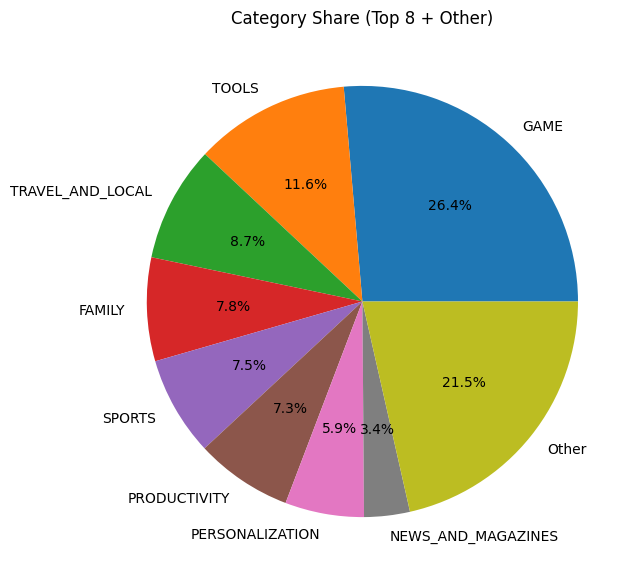

In [262]:

vc = df[cat_col].value_counts()

top = vc.iloc[:8]                     
other = vc.iloc[8:].sum()             

pie = pd.concat([top, pd.Series({"Other": other})])

pie.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(7,7),
    title="Category Share (Top 8 + Other)"
)

plt.ylabel("")
plt.show()


<Axes: title={'center': 'Top 10 Categories by Average Rating'}, xlabel='category'>

Text(0, 0.5, 'Average Rating')

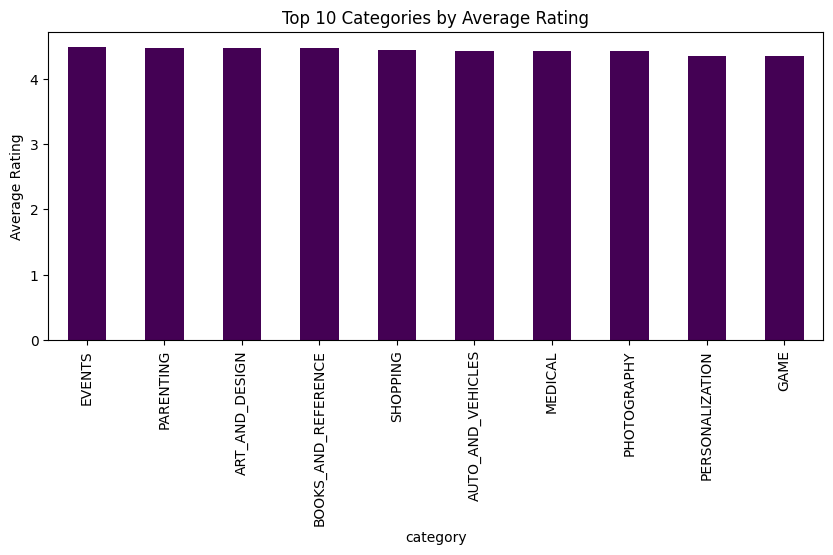

In [271]:
# A1 — Average Rating by Category (top 10)
tmp = df[[cat_col, rating_col]].dropna()
avg_cat = tmp.groupby(cat_col)[rating_col].mean().sort_values(ascending=False).head(10)
avg_cat.plot(kind="bar", figsize=(10,4),colormap ='viridis', title="Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.show()


<Axes: title={'center': 'Top 10 Categories by Average Rating'}, xlabel='category'>

Text(0, 0.5, 'Average Rating')

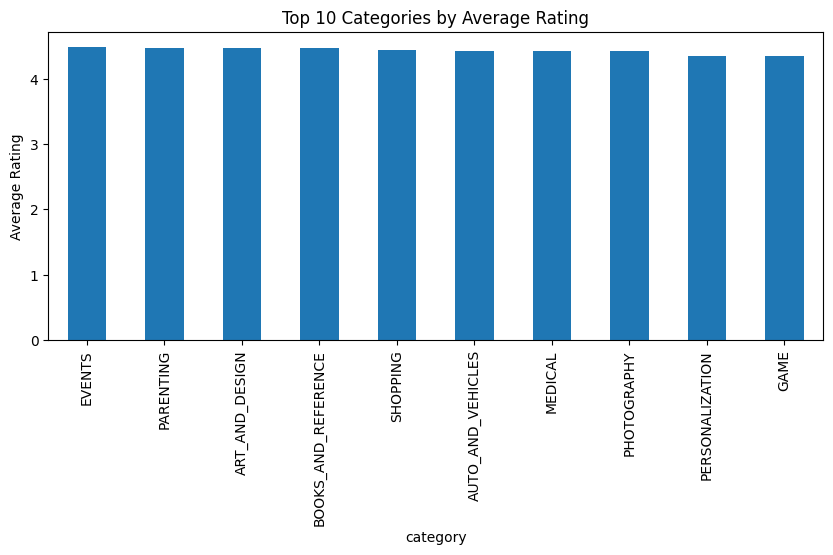

In [277]:

tmp = df[[cat_col, rating_col]].dropna()
avg_cat = tmp.groupby(cat_col)[rating_col].mean().sort_values(ascending=False).head(10)
avg_cat.plot(kind="bar", figsize=(10,4),title="Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.show()


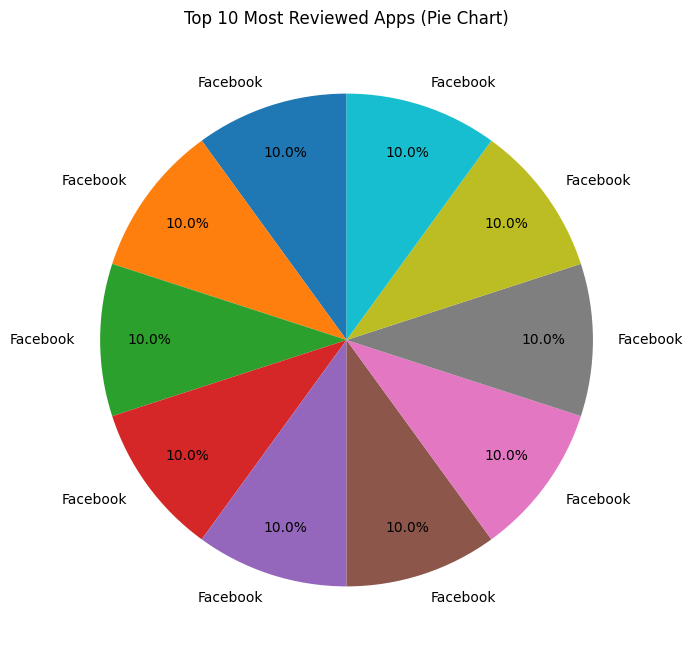

In [261]:

df["reviews"] = pd.to_numeric(df["reviews"], errors="coerce")

top10 = df[["app", "reviews"]].dropna().sort_values("reviews", ascending=False).head(10)

# pie chart
plt.figure(figsize=(8,8))
plt.pie(
    top10["reviews"],
    labels=top10["app"],
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.8
)
plt.title("Top 10 Most Reviewed Apps (Pie Chart)")
plt.show();


<Axes: title={'center': 'Top 10 Installed Apps'}, ylabel='app'>

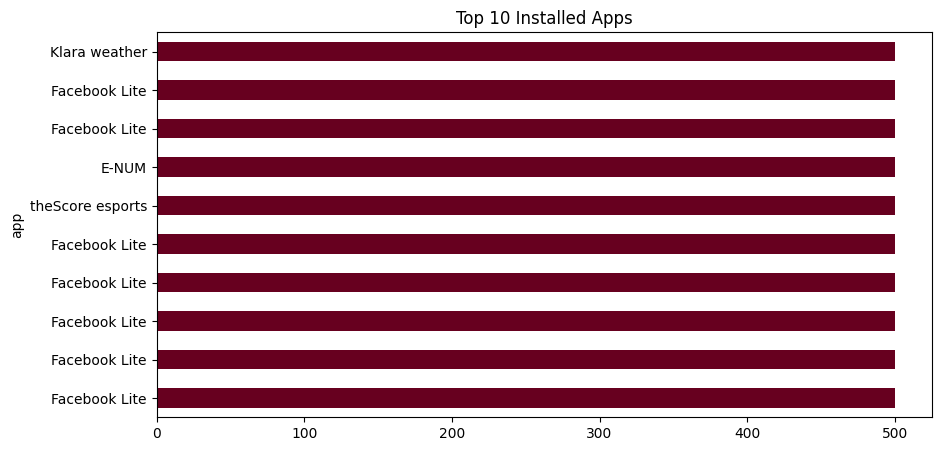

In [281]:
t = df[[app_col, installs_col]].dropna().copy()
t[installs_col] = t[installs_col].astype(str).str.replace(r"[+,]", "", regex=True).str.replace(r"\D+", "", regex=True)
t[installs_col] = pd.to_numeric(t[installs_col], errors="coerce")
top_inst = t.sort_values(installs_col, ascending=False).head(10)
top_inst.plot(x=app_col, y=installs_col, kind="barh", colormap = "RdBu",figsize=(10,5), legend=False, title="Top 10 Installed Apps")
plt.gca().invert_yaxis()
plt.show()

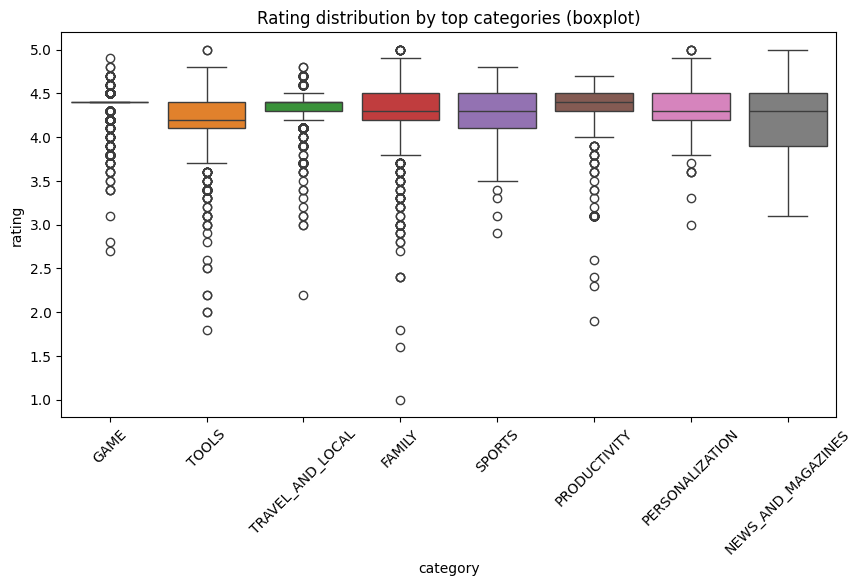

In [241]:
# A4 — Boxplot: Rating distribution by top categories
top_cats = df[cat_col].value_counts().nlargest(8).index.tolist()
data = df[df[cat_col].isin(top_cats)][[cat_col, rating_col]].dropna()
plt.figure(figsize=(10,5))
sns.boxplot(x=cat_col, y=rating_col,palette=sns.color_palette("tab10"), data=data, order=top_cats)
plt.title("Rating distribution by top categories (boxplot)")
plt.xticks(rotation=45)
plt.show();


#  Sentiment Insights – Distribution of positive, negative, and neutral reviews.

In [248]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size_in_m', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver_up', 'key', 'app_jsonrev', 'translated_review_jsonrev',
       'sentiment_jsonrev', 'sentiment_polarity_jsonrev',
       'sentiment_subjectivity_jsonrev', 'size_in_kb', 'days_since_update',
       'update_group'],
      dtype='object')

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment_jsonrev'>

Text(0, 0.5, 'Count')

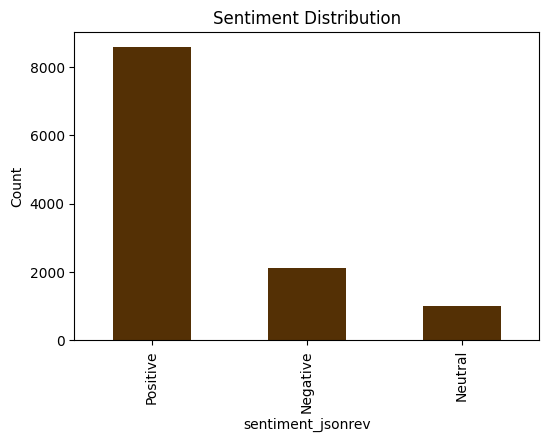

In [278]:
# B1 — Sentiment distribution (counts)
if  'sentiment_jsonrev' in df.columns:
    df['sentiment_jsonrev'].fillna("Unknown").value_counts().plot(kind="bar",colormap = "BrBG", figsize=(6,4), title="Sentiment Distribution")
    plt.ylabel("Count")
    plt.show()
else:
    print("Sentiment column not found.");


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   app                             11709 non-null  object        
 1   category                        11709 non-null  object        
 2   rating                          11709 non-null  float64       
 3   reviews                         11709 non-null  int64         
 4   size_in_m                       8091 non-null   float64       
 5   installs                        11709 non-null  int64         
 6   type                            11709 non-null  object        
 7   price                           11709 non-null  int64         
 8   content_rating                  11709 non-null  object        
 9   genres                          11709 non-null  object        
 10  last_updated                    11709 non-null  datetime64[ns]
 11  cu

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment_subjectivity_jsonrev'>

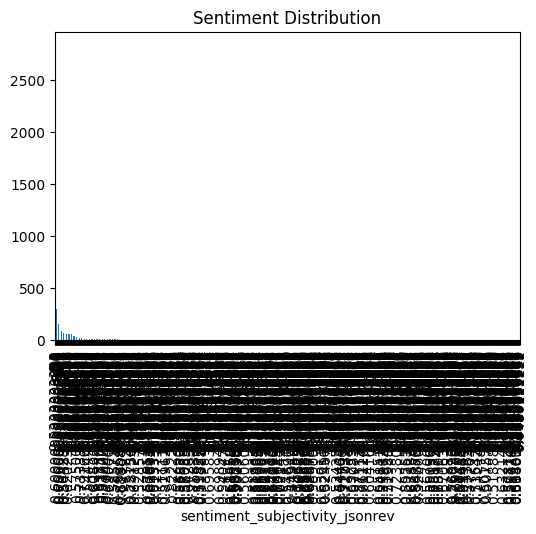

In [254]:

df["sentiment_subjectivity_jsonrev"].value_counts().plot(
    kind="bar", figsize=(6,4), title="Sentiment Distribution"
)


<Axes: title={'center': 'Sentiment Polarity Histogram'}, ylabel='Frequency'>

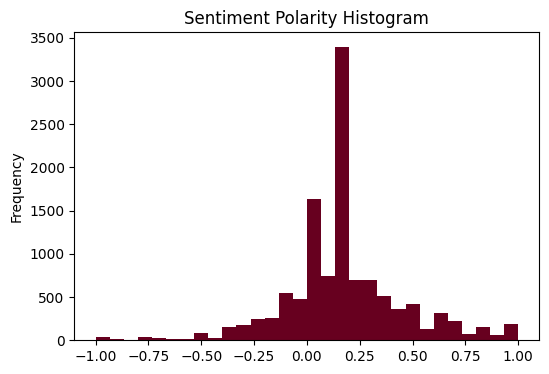

In [280]:

df["sentiment_polarity_jsonrev"].plot(
    kind="hist", bins=30, figsize=(6,4),colormap = "RdBu",
    title="Sentiment Polarity Histogram"
)


# Correlations & Trends – Relation between size, installs, reviews, and ratings.

<Figure size 600x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation matrix')

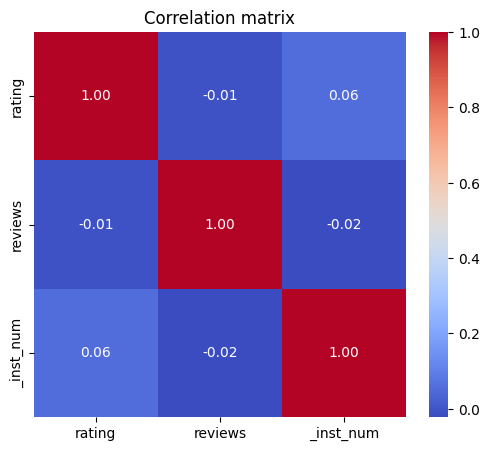

In [255]:
# C1 — Correlation heatmap
cols = []
if rating_col in df.columns: cols.append(rating_col)
if reviews_col in df.columns: cols.append(reviews_col)
if installs_col in df.columns: 
    df["_inst_num"] = df[installs_col].astype(str).str.replace(r"[+,]", "", regex=True).str.replace(r"\D+", "", regex=True)
    df["_inst_num"] = pd.to_numeric(df["_inst_num"], errors="coerce")
    cols.append("_inst_num")
if polar_col in df.columns: cols.append(polar_col)

if len(cols) >= 2:
    corr = df[cols].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation matrix")
    plt.show()
else:
    print("Not enough numeric columns for correlation.")


<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'Installs (log)')

Text(0, 0.5, 'Rating')

Text(0.5, 1.0, 'Rating vs Installs')

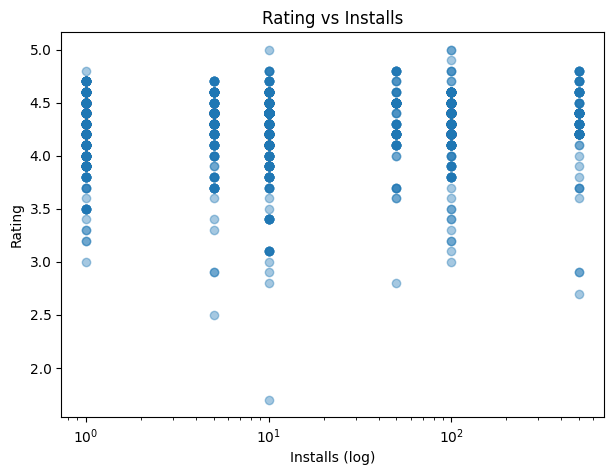

In [256]:

if rating_col in df.columns and installs_col in df.columns:
    tmp = df[[rating_col, installs_col]].dropna().copy()
    tmp[installs_col] = tmp[installs_col].astype(str).str.replace(r"[+,]", "", regex=True).str.replace(r"\D+", "", regex=True)
    tmp[installs_col] = pd.to_numeric(tmp[installs_col], errors="coerce")
    s = tmp.sample(n=min(2000, len(tmp)), random_state=1)
    plt.figure(figsize=(7,5))
    plt.scatter(s[installs_col], s[rating_col], alpha=0.4)
    plt.xscale("log")
    plt.xlabel("Installs (log)")
    plt.ylabel("Rating")
    plt.title("Rating vs Installs")
    plt.show()
else:
    print("Required columns missing.")


<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'Reviews (log)')

Text(0, 0.5, 'Rating')

Text(0.5, 1.0, 'Rating vs Reviews')

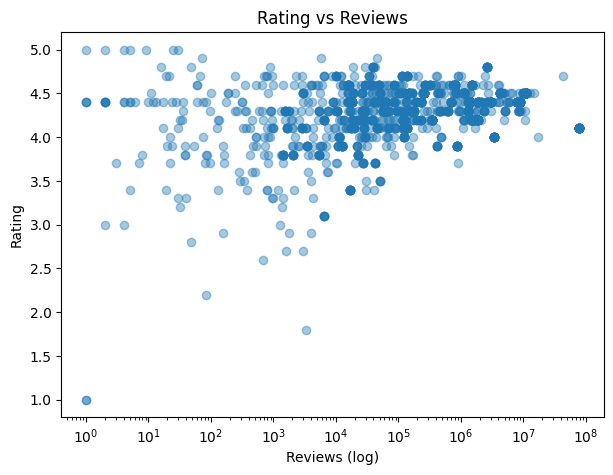

In [287]:

if rating_col in df.columns and reviews_col in df.columns:
    tmp = df[[rating_col, reviews_col]].dropna().copy()
    tmp[reviews_col] = pd.to_numeric(tmp[reviews_col], errors="coerce")
    s = tmp.sample(n=min(2000, len(tmp)), random_state=2)
    plt.figure(figsize=(7,5))
    plt.scatter(s[reviews_col], s[rating_col], alpha=0.4)
    plt.xscale("log")
    plt.xlabel("Reviews (log)")
    plt.ylabel("Rating")
    plt.title("Rating vs Reviews")
    plt.show();
else:
    print("Required columns missing.")


# Temporal Insights – Effect of update frequency on ratings and user sentiment.

<Axes: title={'center': 'Monthly Average Rating'}, xlabel='last_updated'>

Text(0, 0.5, 'Avg Rating')

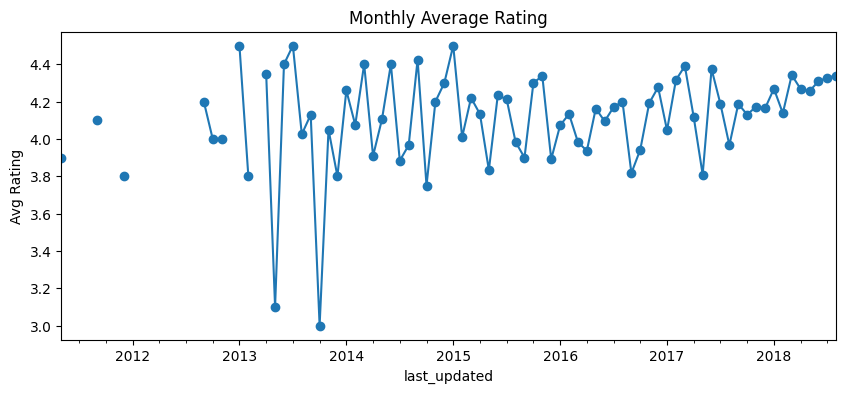

In [258]:
# D1 — Monthly average rating time series
if last_col in df.columns:
    df[last_col] = pd.to_datetime(df[last_col].astype(str).str.replace("\n"," "), errors="coerce")
    ts = df.dropna(subset=[last_col, rating_col]).set_index(last_col).resample("M")[rating_col].mean()
    ts.plot(figsize=(10,4), marker="o", title="Monthly Average Rating")
    plt.ylabel("Avg Rating")
    plt.show()
else:
    print("Last updated column missing.")


<Axes: title={'center': 'Avg Rating by Update Recency'}, xlabel='update_bin'>

Text(0, 0.5, 'Avg Rating')

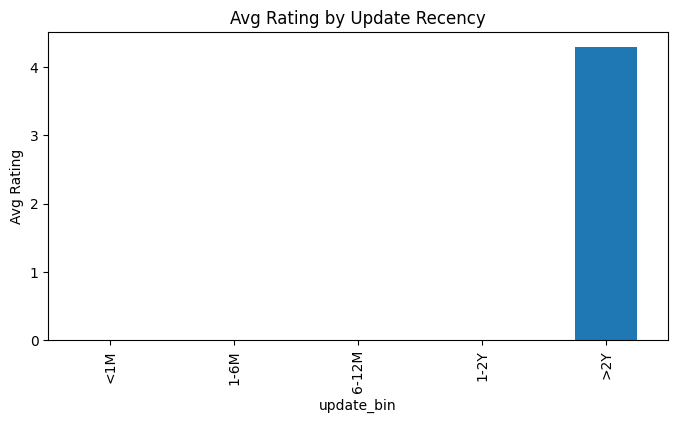

In [259]:
# D2 — Avg rating by update recency bins
if last_col in df.columns and rating_col in df.columns:
    df["days_since_update"] = (pd.Timestamp.today() - pd.to_datetime(df[last_col], errors="coerce")).dt.days
    bins = [-1, 30, 180, 365, 730, 99999]
    labels = ["<1M","1-6M","6-12M","1-2Y",">2Y"]
    df["update_bin"] = pd.cut(df["days_since_update"], bins=bins, labels=labels)
    df.groupby("update_bin")[rating_col].mean().plot(kind="bar", figsize=(8,4), title="Avg Rating by Update Recency")
    plt.ylabel("Avg Rating")
    plt.show()
else:
    print("Missing columns needed for temporal bins.")


<Axes: title={'center': 'Average Rating by Update Recency'}, xlabel='update_group'>

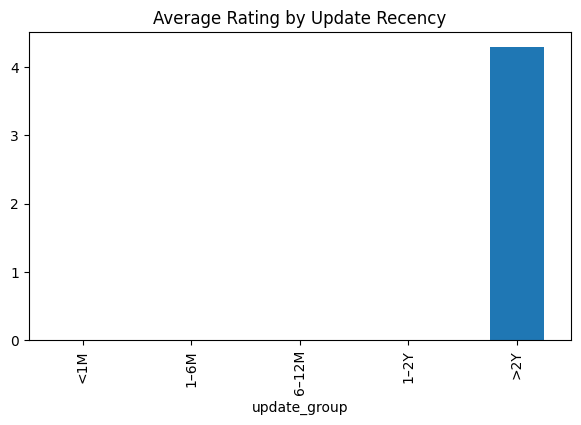

In [227]:


# minimal prep: convert date
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors='ignore')

# compute days since update
today = pd.Timestamp.today()
df["days_since_update"] = (today - df["Last Updated"]).dt.days

# binning
bins = [-1, 30, 180, 365, 730, 99999]
labels = ["<1M", "1–6M", "6–12M", "1–2Y", ">2Y"]
df["update_group"] = pd.cut(df["days_since_update"], bins=bins, labels=labels)

df.groupby("update_group")["Rating"].mean().plot(
    kind="bar", figsize=(7,4),
    title="Average Rating by Update Recency"
)


<Figure size 1000x500 with 0 Axes>

<Axes: title={'center': 'rating'}, xlabel='category'>

Text(0.5, 1.0, 'Rating distribution by category (boxplot)')

Text(0.5, 0.98, '')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Rating')

<Figure size 1000x500 with 0 Axes>

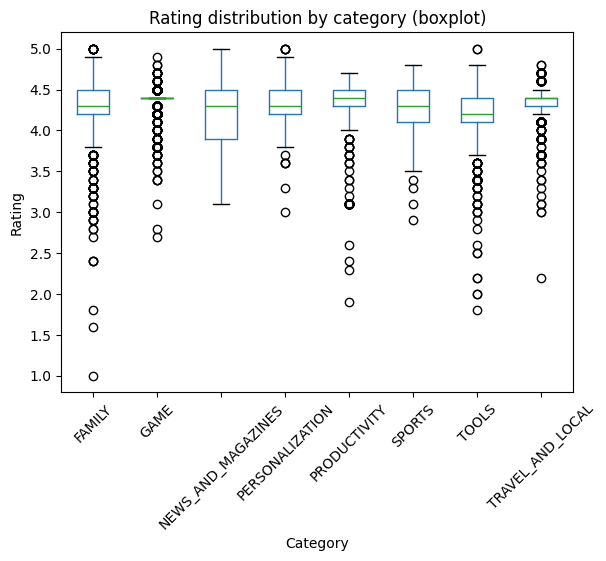

In [293]:
# ---------- CELL: Boxplot - Rating distribution by top categories ----------
# Minimal prep: pick top N categories and draw boxplot of ratings per category
cat_col = "category" if "category" in df.columns else "Category"
rating_col = "rating" if "rating" in df.columns else "rating_num"
top_n = 8

if cat_col in df.columns and rating_col in df.columns:
    top_cats = df[cat_col].value_counts().nlargest(top_n).index.tolist()
    data = df[df[cat_col].isin(top_cats)][[cat_col, rating_col]].dropna()
    # reorder categories for plotting
    order = data.groupby(cat_col)[rating_col].median().sort_values(ascending=False).index
    plt.figure(figsize=(10,5))
    data.boxplot(column=rating_col, by=cat_col, rot=45, grid=False)
    plt.title("Rating distribution by category (boxplot)")
    plt.suptitle("")
    plt.xlabel("Category")
    plt.ylabel("Rating")
    plt.show()
else:
    print("Category or rating column not found.")
